In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import math

from mplsoccer import PyPizza, add_image

In [3]:
df = pd.read_excel(r'C:\Users\Vasilis\Downloads\Football\Players\top5-players.xlsx')

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [7]:
df['Pos'].unique()

array(['DF', 'MF', 'FW', 'GK'], dtype=object)

In [9]:
df1= df.loc[(df['Pos'] == 'MF') & (df['90s'] >= 15)]

In [11]:
df1 = df1.reset_index().drop(['index', 'Rk', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born'], axis = 1)

In [21]:
params = list(df1.columns)
value = params[4]
params = [value] + params[20:]

In [23]:
df1.Player.values

array(['Salis Abdul Samed', 'Laurent Abergel', 'Yacine Adli',
       'Michel Aebischer', 'Ilias Akhomach', 'Maghnes Akliouche',
       'Luis Alberto', 'Rubén Alcaraz', 'Iván Alejo', 'Jim Allevinah',
       'Edson Álvarez', 'Julián Álvarez', 'Benjamin André',
       'Robert Andrich', 'Maximilian Arnold', 'Sergio Arribas',
       'Neil El Aynaoui', 'Iddrisu Baba', 'Milan Badelj', 'Alex Baena',
       'Leon Bailey', 'Jonathan Bamba', 'Nicolò Barella', 'Ross Barkley',
       'Leandro Barreiro Martins', 'Enzo Barrenechea', 'Pablo Barrios',
       'Jude Bellingham', 'Fran Beltrán', 'Nabil Bentaleb',
       'Sander Berge', 'Matúš Bero', 'Philip Billing', 'Yves Bissouma',
       'Leonardo Bittencourt', 'Antonio Blanco', 'Alexis Blin',
       'Daniel Boloca', 'Giacomo Bonaventura', 'Warren Bondo',
       'Hicham Boudaoui', 'Benjamin Bourigeaud', 'Edoardo Bove',
       'Julian Brandt', 'Marco Brescianini', 'Josh Brownhill',
       'Moisés Caicedo', 'Tom Cairney', 'Hakan Çalhanoğlu',
       'Lami

In [25]:
player = df1.loc[df1['Player'] == 'Florian Wirtz'].reset_index().drop('index', axis = 1)
player = list(player.loc[0])
value = player [4]
player = [value] + player[20:]

In [27]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df1[params[x]], player[x])))

In [29]:
values

[66, 97, 98, 99, 97, 99, 96, 94, 97, 97, 98]

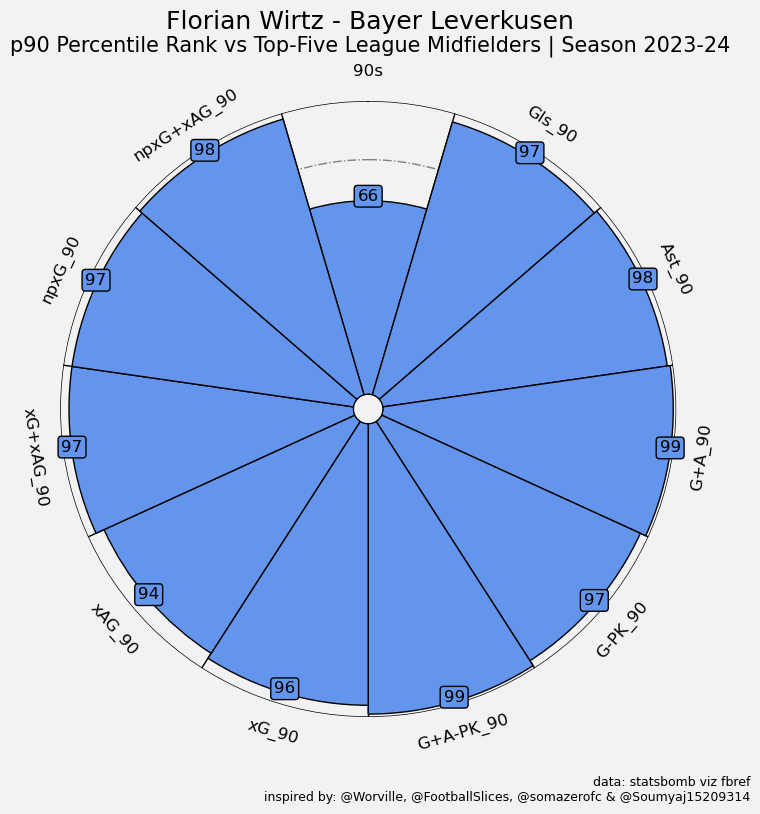

In [31]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Florian Wirtz - Bayer Leverkusen", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "p90 Percentile Rank vs Top-Five League Midfielders | Season 2023-24",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()